In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn , FasterRCNN_ResNet50_FPN_Weights
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch.optim as optim
import torchvision.transforms as T
import torch.nn as nn

In [2]:
model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 66.4MB/s]


In [3]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
!pip install torch_snippets
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import PIL
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torch_snippets import Report
import os
import time
import xml.etree.ElementTree as ET# Connect to the GPU if one exists.
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 107.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 110.9 MB/s e

In [5]:
! pip install -q kaggle


In [6]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amrabdellatif","key":"77defb1338f9002c0ce340ef662dc3b2"}'}

In [7]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download 'andrewmvd/dog-and-cat-detection'
!unzip -q dog-and-cat-detection.zip

100% 1.03G/1.03G [00:58<00:00, 18.7MB/s]
100% 1.03G/1.03G [00:58<00:00, 18.8MB/s]


In [8]:
def xml_to_dict(xml_path):
    # Decode the .xml file
    tree = ET.parse(xml_path)
    root = tree.getroot()    # Return the image size, object label and bounding box
    # coordinates together with the filename as a dict.
    return {"filename": xml_path,
            "image_width": int(root.find("./size/width").text),
            "image_height": int(root.find("./size/height").text),
            "image_channels": int(root.find("./size/depth").text),
            "label": root.find("./object/name").text,
            "x1": int(root.find("./object/bndbox/xmin").text),
            "y1": int(root.find("./object/bndbox/ymin").text),
            "x2": int(root.find("./object/bndbox/xmax").text),
            "y2": int(root.find("./object/bndbox/ymax").text)}

In [9]:
# Convert human-readable string label to integer.
label_dict = {"dog": 1, "cat": 2}
# Convert label integer to human-readable string.
reverse_label_dict = {1: "dog", 2: "cat"}

class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None):
        """
        Inputs
            root: str
                Path to the data folder.
            transforms: Compose or list
                Torchvision image transformations.
        """
        self.root = root
        self.transforms = transforms
        self.files = sorted(os.listdir("images"))

        for i in range(len(self.files)):
            self.files[i] = self.files[i].split(".")[0]
            self.label_dict = label_dict

    def __getitem__(self, i):
        # Load image from the hard disc.
        img = PIL.Image.open(os.path.join(self.root, "images/" + self.files[i] + ".png")).convert("RGB")

        # Load annotation file from the hard disc.
        ann = xml_to_dict(os.path.join(self.root, "annotations/" + self.files[i] + ".xml"))

        # The target is given as a dictionary.
        target = {}
        target["boxes"] = torch.as_tensor([[ann["x1"], ann["y1"], ann["x2"], ann["y2"]]], dtype=torch.float32)
        target["labels"] = torch.as_tensor([label_dict[ann["label"]]], dtype=torch.int64)
        target["image_id"] = torch.as_tensor(i)

        # Apply any transforms to the data if required.
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.files)


In [10]:
import torchvision.transforms.functional as F
import torchvision.transforms.transforms as T
class Compose:
    """
    Composes several torchvision image transforms
    as a sequence of transformations.
    Inputs
        transforms: list
            List of torchvision image transformations.
    Returns
        image: tensor
        target: dict
    """
    def __init__(self, transforms = []):
        self.transforms = transforms    # __call__ sequentially performs the image transformations on
    # the input image, and returns the augmented image.
    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

In [11]:
class ToTensor(torch.nn.Module):
    """
    Converts a PIL image into a torch tensor.
    Inputs
        image: PIL Image
        target: dict
    Returns
        image: tensor
        target: dict
    """
    def forward(self, image, target=None):
        image = F.pil_to_tensor(image)
        image = F.convert_image_dtype(image)
        return image, target

class RandomHorizontalFlip(T.RandomHorizontalFlip):
    """
    Randomly flips an image horizontally.
    Inputs
        image: tensor
        target: dict
    Returns
        image: tensor
        target: dict
    """
    def forward(self, image, target=None):
        if torch.rand(1) < self.p:
            image = F.hflip(image)
            if target is not None:
                width, _ = F.get_image_size(image)
                target["boxes"][:, [0, 2]] = width - target["boxes"][:, [2, 0]]
        return image, target


In [12]:
def get_transform(train):
    """
    Transforms a PIL Image into a torch tensor and performs
    random horizontal flipping of the image if training a model.
    Inputs
        train: bool
            Flag indicating whether model training will occur.
    Returns
        compose: Compose
            Composition of image transforms.
    """
    transforms = []

    # ToTensor is applied to all images.
    transforms.append(ToTensor())

    # The following transforms are applied only to the train set.
    if train:
        transforms.append(RandomHorizontalFlip(0.5))
        # Other transforms can be added here later on.

    return Compose(transforms)


In [13]:
# Train dataset.
# Set train = True to apply the training image transforms.
train_ds = CatDogDataset("./", get_transform(train = True))# Validation dataset.
val_ds = CatDogDataset("./", get_transform(train = False))# Test dataset.
test_ds = CatDogDataset("./", get_transform(train = False))

In [14]:
# Randomly shuffle all the data.
indices = torch.randperm(len(train_ds)).tolist()# We split the entire data into 80/20 train-test splits. We further
# split the train set into 80/20 train-validation splits. # Train dataset: 64% of the entire data, or 80% of 80%.
train_ds = torch.utils.data.Subset(train_ds,
           indices[:int(len(indices) * 0.64)])# Validation dataset: 16% of the entire data, or 20% of 80%.
val_ds = torch.utils.data.Subset(val_ds,
         indices[int(len(indices) * 0.64):int(len(indices) * 0.8)])# Test dataset: 20% of the entire data.
test_ds = torch.utils.data.Subset(test_ds,
          indices[int(len(indices) * 0.8):])

In [15]:
# Collate image-target pairs into a tuple.
def collate_fn(batch):
    return tuple(zip(*batch))# Create the DataLoaders from the Datasets.
train_dl = torch.utils.data.DataLoader(train_ds,
                                 batch_size = 4,
                                 shuffle = True,
                        collate_fn = collate_fn)
val_dl = torch.utils.data.DataLoader(val_ds,
                             batch_size = 4,
                            shuffle = False,
                    collate_fn = collate_fn)
test_dl = torch.utils.data.DataLoader(test_ds,
                               batch_size = 4,
                              shuffle = False,
                      collate_fn = collate_fn)

In [16]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def get_object_detection_model(num_classes=3, feature_extraction=True):
    """
    Inputs
        num_classes: int
            Number of classes to predict. Must include the
            background which is class 0 by definition!
        feature_extraction: bool
            Flag indicating whether to freeze the pre-trained
            weights. If set to True, the pre-trained weights will be
            frozen and not be updated during training.
    Returns
        model: FasterRCNN
    """
    # Load the pretrained Faster R-CNN model.
    model = fasterrcnn_resnet50_fpn(pretrained=True)

    # If True, the pre-trained weights will be frozen.
    if feature_extraction:
        for p in model.parameters():
            p.requires_grad = False

    # Replace the original 91 class top layer with a new layer tailored for num_classes.
    in_feats = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_feats, num_classes)

    return model


In [17]:
def unbatch(batch, device):
    """
    Unbatches a batch of data from the Dataloader.
    Inputs
        batch: tuple
            Tuple containing a batch from the Dataloader.
        device: str
            Indicates which device (CPU/GPU) to use.
    Returns
        X: list
            List of images.
        y: list
            List of dictionaries.
    """
    X, y = batch
    X = [x.to(device) for x in X]
    y = [{k: v.to(device) for k, v in t.items()} for t in y]
    return X, y

def train_batch(batch, model, optimizer, device):
    """
    Uses back propagation to train a model.
    Inputs
        batch: tuple
            Tuple containing a batch from the Dataloader.
        model: torch model
        optimizer: torch optimizer
        device: str
            Indicates which device (CPU/GPU) to use.
    Returns
        loss: float
            Sum of the batch losses.
        losses: dict
            Dictionary containing the individual losses.
    """
    model.train()
    X, y = unbatch(batch, device=device)
    optimizer.zero_grad()
    losses = model(X, y)
    loss = sum(loss for loss in losses.values())
    loss.backward()
    optimizer.step()
    return loss, losses

@torch.no_grad()
def validate_batch(batch, model, optimizer, device):
    """
    Evaluates a model's loss value using validation data.
    Inputs
        batch: tuple
            Tuple containing a batch from the Dataloader.
        model: torch model
        optimizer: torch optimizer
        device: str
            Indicates which device (CPU/GPU) to use.
    Returns
        loss: float
            Sum of the batch losses.
        losses: dict
            Dictionary containing the individual losses.
    """
    model.train()
    X, y = unbatch(batch, device=device)
    optimizer.zero_grad()
    losses = model(X, y)
    loss = sum(loss for loss in losses.values())
    return loss, losses


In [18]:
def train_fasterrcnn(model,
                     optimizer,
                     n_epochs,
                     train_loader,
                     test_loader=None,
                     log=None,
                     keys=None,
                     device="cpu"):
    """
    Trains a FasterRCNN model using train and validation
    Dataloaders over n_epochs.
    Returns a Report on the training and validation losses.

    Inputs
        model: FasterRCNN
        optimizer: torch optimizer
        n_epochs: int
            Number of epochs to train.
        train_loader: DataLoader
        test_loader: DataLoader
        log: Record
            torch_snippet Record to record training progress.
        keys: list
            List of strs containing the FasterRCNN loss names.
        device: str
            Indicates which device (CPU/GPU) to use.

    Returns
        log: Record
            torch_snippet Record containing the training records.
    """
    if log is None:
        log = Report(n_epochs)

    if keys is None:
        # FasterRCNN loss names.
        keys = ["loss_classifier",
                "loss_box_reg",
                "loss_objectness",
                "loss_rpn_box_reg"]

    model.to(device)

    for epoch in range(n_epochs):
        N = len(train_loader)

        for ix, batch in enumerate(train_loader):
            loss, losses = train_batch(batch, model, optimizer, device)

            # Record the current train loss.
            pos = epoch + (ix + 1) / N
            log.record(pos=pos, trn_loss=loss.item(), end="\r")

        if test_loader is not None:
            N = len(test_loader)

            for ix, batch in enumerate(test_loader):
                loss, losses = validate_batch(batch, model, optimizer, device)

                # Record the current validation loss.
                pos = epoch + (ix + 1) / N
                log.record(pos=pos, val_loss=loss.item(), end="\r")

    log.report_avgs(epoch + 1)

    return log


In [19]:
# Create the Faster R-CNN model with 3 classes - dog, cat, and background.
model = get_object_detection_model(num_classes=3, feature_extraction=False)

# Use the stochastic gradient descent optimizer.
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Train the model over 1 epoch.
log = train_fasterrcnn(model=model,
                       optimizer=optimizer,
                       n_epochs=1,
                       train_loader=train_dl,
                       test_loader=val_dl,
                       log=None,
                       keys=None,
                       device=device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EPOCH: 1.000  trn_loss: 0.121  val_loss: 0.079  (1005.97s - 0.00s remaining)


In [20]:
@torch.no_grad()
def predict_batch(batch, model, device):
    """
    Gets the predictions for a batch of data.
    Inputs
        batch: tuple
            Tuple containing a batch from the Dataloader.
        model: torch model
        device: str
            Indicates which device (CPU/GPU) to use.
    Returns
        images: list
            List of tensors of the images.
        predictions: list
            List of dicts containing the predictions for the
            bounding boxes, labels, and confidence scores.
    """
    model.to(device)
    model.eval()
    X, _ = unbatch(batch, device=device)
    predictions = model(X)
    return [x.cpu() for x in X], predictions

def predict(model, data_loader, device="cpu"):
    """
    Gets the predictions for a batch of data.
    Inputs
        model: torch model
        data_loader: torch Dataloader
        device: str
            Indicates which device (CPU/GPU) to use.
    Returns
        images: list
            List of tensors of the images.
        predictions: list
            List of dicts containing the predictions for the
            bounding boxes, labels, and confidence scores.
    """
    images = []
    predictions = []

    for i, batch in enumerate(data_loader):
        X, p = predict_batch(batch, model, device)
        images.extend(X)
        predictions.extend(p)

    return images, predictions


In [21]:
def decode_prediction(prediction,
                      score_threshold=0.8,
                      nms_iou_threshold=0.2):
    """
    Inputs
        prediction: dict
        score_threshold: float
        nms_iou_threshold: float
    Returns
        prediction: tuple
    """
    boxes = prediction["boxes"]
    scores = prediction["scores"]
    labels = prediction["labels"]

    # Remove any low-score predictions.
    if score_threshold is not None:
        want = scores > score_threshold
        boxes = boxes[want]
        scores = scores[want]
        labels = labels[want]

    # Remove any overlapping bounding boxes using NMS.
    if nms_iou_threshold is not None:
        want = torchvision.ops.nms(boxes=boxes, scores=scores, iou_threshold=nms_iou_threshold)
        boxes = boxes[want]
        scores = scores[want]
        labels = labels[want]

    return (boxes.cpu().numpy(), labels.cpu().numpy(), scores.cpu().numpy())


In [22]:
images, predictions = predict(model, test_dl, device)

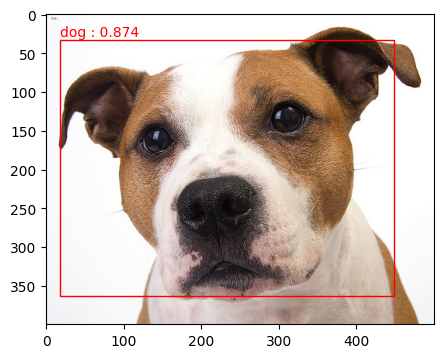

In [24]:
img_index = 0
boxes, labels, scores = decode_prediction(predictions[img_index])

fig, ax = plt.subplots(figsize=[5, 5])
ax.imshow(images[img_index].permute(1, 2, 0).numpy())

for i, b in enumerate(boxes):
    rect = patches.Rectangle(b[:2].astype(int),
                             (b[2] - b[0]).astype(int),
                             (b[3] - b[1]).astype(int),
                             linewidth=1,
                             edgecolor="r",
                             facecolor="none")
    ax.add_patch(rect)
    ax.text(b[0].astype(int),
            b[1].astype(int) - 5,
            "{} : {:.3f}".format(reverse_label_dict[labels[i]],
                                  scores[i]), color="r")

plt.show()


In [ ]:
# https://medium.com/@natsunoyuki/teaching-a-model-to-become-an-expert-at-locating-cats-and-dogs-in-images-716cdbc8d48f